# Main File

## Import Packages

In [1]:
import pandas as pd
from data_preprocessing_funcs import *
from modelling_funcs import *
from ESGBERT import *
import swifter
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Text Files / Reports

### Import and preprocess SGX / SNP Files and saving it to pickle files (Dataframe with tokens)

#### SGX

In [4]:
sgx = preprocess_sgx_files()
sgx.to_pickle('sgx.pkl')

Extracting & Preprocessing SGX Sustainability Reports...


100%|██████████| 1318/1318 [01:01<00:00, 21.54it/s]


Done...!


#### SNP

In [ ]:
snp = preprocess_snp_files()
snp.to_pickle('snp.pkl')

Extracting & Preprocessing SNP500 Annual / Quarterly Reports...


100%|██████████| 18296/18296 [56:43<00:00,  5.38it/s]  


Done...!


## Objective 1: Modelling Quantitative Trends

### Bag Of Words Model

#### SGX

In [2]:
# Modelling quantitative Trends
sgx = pd.read_pickle('sgx.pkl')
sgx_quant = model_tokens_BOW(sgx)
sgx_quant.to_pickle('sgx_quant.pkl')

100%|██████████| 1318/1318 [00:22<00:00, 59.91it/s]


#### SNP

In [ ]:
snp = pd.read_pickle('snp.pkl')
snp_quant = model_tokens_BOW(snp)
snp_quant.to_pickle('snp_quant.pkl')

 49%|████▉     | 9049/18296 [23:21<23:03,  6.68it/s]

#### SGX Ann

In [3]:
sgx_ann = pd.read_pickle('sgx_ann.pkl')
sgx_ann_quant = model_tokens_BOW(sgx_ann)
sgx_ann_quant.to_pickle('sgx_ann_quant.pkl')

100%|██████████| 181/181 [00:01<00:00, 111.13it/s]


### Extract Trends

#### SGX

In [4]:
sgx_quant = pd.read_pickle('sgx_quant.pkl')
sgx_quant_processed = extract_companies_with_trend(sgx_quant)
sgx_quant_processed.to_excel('sgx_quant_results.xlsx')

#### SNP

In [ ]:
snp_quant = pd.read_pickle('snp_quant.pkl')
snp_quant_results = extract_companies_with_trend(snp_quant)
snp_quant_results.to_excel('snp_quant_results.xlsx')

#### SGX ANN

In [3]:
sgx_ann_quant = pd.read_pickle('sgx_ann_quant.pkl')
sgx_ann_quant_processed = extract_companies_with_trend(sgx_ann_quant)
sgx_ann_quant_processed.to_excel('sgx_ann_quant_results.xlsx')

### Scrape Company Descriptions

In [3]:
sgx_quant = pd.read_excel('sgx_quant_results.xlsx')
sgx_quant_desc = scrape_company_descriptions(sgx_quant, 'sg')
sgx_quant_desc.to_excel('sgx_quant_results_desc.xlsx')

100%|██████████| 27/27 [00:24<00:00,  1.12it/s]


In [4]:
sgx_ann_quant = pd.read_excel('sgx_ann_quant_results.xlsx')
sgx_ann_quant_desc = scrape_company_descriptions(sgx_ann_quant, 'sg')
sgx_ann_quant_desc.to_excel('sgx_ann_quant_results_desc.xlsx')

100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


In [5]:
snp_quant_results = pd.read_excel('snp_quant_results.xlsx')
snp_quant_results_desc = scrape_company_descriptions(snp_quant_results, 'us')
snp_quant_results_desc.to_excel('snp_quant_results_desc.xlsx')

100%|██████████| 491/491 [19:06<00:00,  2.33s/it]


### Normalize Trend Strength within markets

In [2]:
sgx_quant_results = pd.read_excel('sgx_quant_results_desc.xlsx')
sgx_quant_results['E_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['E_Strength'])
sgx_quant_results['S_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['S_Strength'])
sgx_quant_results['G_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['G_Strength'])

sgx_ann_quant_results = pd.read_excel('sgx_ann_quant_results_desc.xlsx')
sgx_ann_quant_results['E_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['E_Strength'])
sgx_ann_quant_results['S_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['S_Strength'])
sgx_ann_quant_results['G_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['G_Strength'])

snp_quant_results = pd.read_excel('snp_quant_results_desc.xlsx')
snp_quant_results['E_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['E_Strength'])
snp_quant_results['S_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['S_Strength'])
snp_quant_results['G_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['G_Strength'])

### Merge datasets into one results file

In [3]:
sgx_quant_results['Market'] = 'Singapore'
sgx_quant_results['Data Source'] = 'Sustainability Reports'

sgx_ann_quant_results['Market'] = 'Singapore'
sgx_ann_quant_results['Data Source'] = 'Annual Reports'

snp_quant_results['Market'] = 'US'
snp_quant_results['Data Source'] = '10-K / 10-Q'

total_df = pd.concat([sgx_quant_results, sgx_ann_quant_results, snp_quant_results])
total_df.to_excel('total_results.xlsx')

## Objective 2: Qualitative Exploration of Trends

#### 3 Companies Identified:
1. Singapore Airlines Ltd. (SGX)
2. Wilmar International Ltd. (SGX)
3. Applied Materials (SNP)

#### Extract Companies

In [2]:
df = pd.read_excel('total_results.xlsx')

In [3]:
# Singapore Airlines Ltd.
sia = pd.concat([df[df['Company Name'] == 'SINGAPORE AIRLINES LIMITED'].copy(),
                 df[df['Company Name'] == 'SINGAPORE AIRLINES LTD'].copy()])
# Wilmar International Ltd.
wilmar = df[df['Company Name'] == 'WILMAR INTERNATIONAL LIMITED'].copy()
# Applied Materials
applied_mat = df[df['Company Name'] == 'Applied Materials'].copy()

In [4]:
sia

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Ticker,Quarter,Tokens,Company Name,File Name,Date,Environmental,...,S_Strength,G_Trend,G_Strength,Description,E_Strength_Normalized,S_Strength_Normalized,G_Strength_Normalized,Market,Data Source,FileName
133,133,133,133,C6L,2017Q1,"['sustainability', 'report', 'fy', 'overview',...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2017-03).txt,2017-03,414,...,-2,True,-8,"Singapore Airlines Limited, together with subs...",1.242492,-0.768481,-1.170883,Singapore,Sustainability Reports,NaN
134,134,134,134,C6L,2018Q1,"['singapore', 'airline', 'sustainability', 're...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2018-03).txt,2018-03,564,...,-2,True,-8,"Singapore Airlines Limited, together with subs...",1.242492,-0.768481,-1.170883,Singapore,Sustainability Reports,NaN
135,135,135,135,C6L,2019Q1,"['singapore', 'airline', 'historical', 'timeli...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2019-03).txt,2019-03,751,...,-2,True,-8,"Singapore Airlines Limited, together with subs...",1.242492,-0.768481,-1.170883,Singapore,Sustainability Reports,NaN
136,136,136,136,C6L,2020Q1,"['singapore', 'airline', 'sustainability', 're...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2020-03).txt,2020-03,1538,...,-2,True,-8,"Singapore Airlines Limited, together with subs...",1.242492,-0.768481,-1.170883,Singapore,Sustainability Reports,NaN
137,137,137,137,C6L,2021Q1,"['content', 'introduction', 'sustainability', ...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2021-03).txt,2021-03,1679,...,-2,True,-8,"Singapore Airlines Limited, together with subs...",1.242492,-0.768481,-1.170883,Singapore,Sustainability Reports,NaN
259,105,105,105,C6L,2015Q1,"['annual', 'report', 'fy', 'path', 'progress',...",SINGAPORE AIRLINES LTD,NaN,2015-01-01 00:00:00,101,...,16,True,18,"Singapore Airlines Limited, together with subs...",0.571096,0.259643,0.930870,Singapore,Annual Reports,SIA 2015.pdf
260,106,106,106,C6L,2016Q1,"['strengthening', 'position', 'leadership', 'a...",SINGAPORE AIRLINES LTD,NaN,2016-01-01 00:00:00,93,...,16,True,18,"Singapore Airlines Limited, together with subs...",0.571096,0.259643,0.930870,Singapore,Annual Reports,SIA 2016.pdf
261,107,107,107,C6L,2017Q1,"['annual', 'report', 'fy', 'singapore', 'airli...",SINGAPORE AIRLINES LTD,NaN,2017-01-01 00:00:00,106,...,16,True,18,"Singapore Airlines Limited, together with subs...",0.571096,0.259643,0.930870,Singapore,Annual Reports,SIA 2017.pdf
262,108,108,108,C6L,2018Q1,"['annual', 'report', 'fy', 'embarking', 'trans...",SINGAPORE AIRLINES LTD,NaN,2018-01-01 00:00:00,128,...,16,True,18,"Singapore Airlines Limited, together with subs...",0.571096,0.259643,0.930870,Singapore,Annual Reports,SIA 2018.pdf
263,109,109,109,C6L,2019Q1,"['annual', 'report', 'fy', 'mission', 'stateme...",SINGAPORE AIRLINES LTD,NaN,2019-01-01 00:00:00,131,...,16,True,18,"Singapore Airlines Limited, together with subs...",0.571096,0.259643,0.930870,Singapore,Annual Reports,SIA 2019.pdf


In [5]:
wilmar

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Ticker,Quarter,Tokens,Company Name,File Name,Date,Environmental,...,S_Strength,G_Trend,G_Strength,Description,E_Strength_Normalized,S_Strength_Normalized,G_Strength_Normalized,Market,Data Source,FileName
148,148,148,148,F34,2015Q4,"['deforestation', 'peat', 'exploitation', 'pol...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2015-12).txt,2015-12,105,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
149,149,149,149,F34,2016Q4,"['care', 'wilmar', 'international', 'limited',...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2016-12).txt,2016-12,553,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
150,150,150,150,F34,2017Q4,"['moving', 'forward', 'together', 'sustainabil...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2017-12).txt,2017-12,870,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
151,151,151,151,F34,2018Q4,"['wilmar', 'international', 'limited', 'drivin...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2018-12).txt,2018-12,812,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
152,152,152,152,F34,2019Q4,"['sustainability', 'report', 'responsible', 's...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2019-12).txt,2019-12,1017,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
153,153,153,153,F34,2020Q4,"['sustainability', 'report', 'reflect', 'adapt...",WILMAR INTERNATIONAL LIMITED,WILMAR INTERNATIONAL LIMITED (2020-12).txt,2020-12,1497,...,11,True,-11,Wilmar International Limited operates as an ag...,1.437542,1.749519,-1.730292,Singapore,Sustainability Reports,NaN
313,159,159,159,F34,2015Q1,"['wilmar', 'international', 'limited', 'annual...",WILMAR INTERNATIONAL LIMITED,NaN,2015-01-01 00:00:00,153,...,19,False,11,Wilmar International Limited operates as an ag...,-1.235643,0.624963,0.349136,Singapore,Annual Reports,Wilmar 2015.pdf
314,160,160,160,F34,2016Q1,"['year', 'growth', 'th', 'anniversary', 'annua...",WILMAR INTERNATIONAL LIMITED,NaN,2016-01-01 00:00:00,227,...,19,False,11,Wilmar International Limited operates as an ag...,-1.235643,0.624963,0.349136,Singapore,Annual Reports,Wilmar 2016.pdf
315,161,161,161,F34,2017Q1,"['global', 'connection', 'annual', 'report', '...",WILMAR INTERNATIONAL LIMITED,NaN,2017-01-01 00:00:00,202,...,19,False,11,Wilmar International Limited operates as an ag...,-1.235643,0.624963,0.349136,Singapore,Annual Reports,Wilmar 2017.pdf
316,162,162,162,F34,2018Q1,"['annual', 'report', '≈', 'ha', 'forest', 'con...",WILMAR INTERNATIONAL LIMITED,NaN,2018-01-01 00:00:00,183,...,19,False,11,Wilmar International Limited operates as an ag...,-1.235643,0.624963,0.349136,Singapore,Annual Reports,Wilmar 2018.pdf


In [6]:
applied_mat

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Ticker,Quarter,Tokens,Company Name,File Name,Date,Environmental,...,S_Strength,G_Trend,G_Strength,Description,E_Strength_Normalized,S_Strength_Normalized,G_Strength_Normalized,Market,Data Source,FileName
1344,1016,1016,1016,AMAT,2010Q2,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2010-05-02.txt,2010-05-02,119,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1345,1017,1017,1017,AMAT,2010Q3,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2010-08-01.txt,2010-08-01,143,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1346,1018,1018,1018,AMAT,2010Q4,"['k', 'fevk', 'htm', 'form', 'k', 'evk', 'tabl...",Applied Materials,AMAT 2010-10-31.txt,2010-10-31,219,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1347,1019,1019,1019,AMAT,2011Q1,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-01-30.txt,2011-01-30,97,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1348,1020,1020,1020,AMAT,2011Q2,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-05-01.txt,2011-05-01,110,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1349,1021,1021,1021,AMAT,2011Q3,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-07-31.txt,2011-07-31,117,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1350,1022,1022,1022,AMAT,2011Q4,"['k', 'ddk', 'htm', 'form', 'k', 'form', 'k', ...",Applied Materials,AMAT 2011-10-30.txt,2011-10-30,241,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1351,1023,1023,1023,AMAT,2012Q1,"['q', 'ddq', 'htm', 'form', 'q', 'form', 'q', ...",Applied Materials,AMAT 2012-01-29.txt,2012-01-29,114,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1352,1024,1024,1024,AMAT,2012Q2,"['q', 'amat', 'xqxdoc', 'htm', 'form', 'q', 'a...",Applied Materials,AMAT 2012-04-29.txt,2012-04-29,138,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN
1353,1025,1025,1025,AMAT,2012Q3,"['q', 'amat', 'xqxdoc', 'htm', 'form', 'q', 'a...",Applied Materials,AMAT 2012-07-29.txt,2012-07-29,141,...,887,True,659,"Applied Materials, Inc. engages in the provisi...",-2.480583,2.550117,1.075771,US,10-K / 10-Q,NaN


### Join tokens to form sentences to pass into ESGBERT

In [7]:
sia['Tokens'] = sia['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))
wilmar['Tokens'] = wilmar['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))
applied_mat['Tokens'] = applied_mat['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))

In [8]:
sia['sentences'] = sia['Tokens'].apply(lambda x: join_sentences(x))
wilmar['sentences'] = wilmar['Tokens'].apply(lambda x: join_sentences(x))
applied_mat['sentences'] = applied_mat['Tokens'].apply(lambda x: join_sentences(x))

In [9]:
print("Running ESGBERT for SIA...")
sia_bert = ESGBERT_clf(sia)
sia_bert.to_pickle('sia_bert.pkl')
print("done...!")

print("Running ESGBERT for Wilmar...")
wilmar_bert = ESGBERT_clf(wilmar)
wilmar_bert.to_pickle('wilmar_bert.pkl')
print("done...!")

print("Running ESGBERT for Applied Materials...")
applied_mat_bert = ESGBERT_clf(applied_mat)
applied_mat_bert.to_pickle('applied_mat_bert.pkl')
print("Done...!")

Running ESGBERT for SIA...


100%|██████████| 13/13 [04:03<00:00, 18.75s/it]


done...!
Running ESGBERT for Wilmar...


100%|██████████| 13/13 [04:20<00:00, 20.01s/it]


done...!
Running ESGBERT for Applied Materials...


100%|██████████| 50/50 [15:36<00:00, 18.73s/it]

Done...!


## Plot Topic Modelling

### Singapore Airlines Limited

In [21]:
sia = pd.read_pickle('sia_bert.pkl')

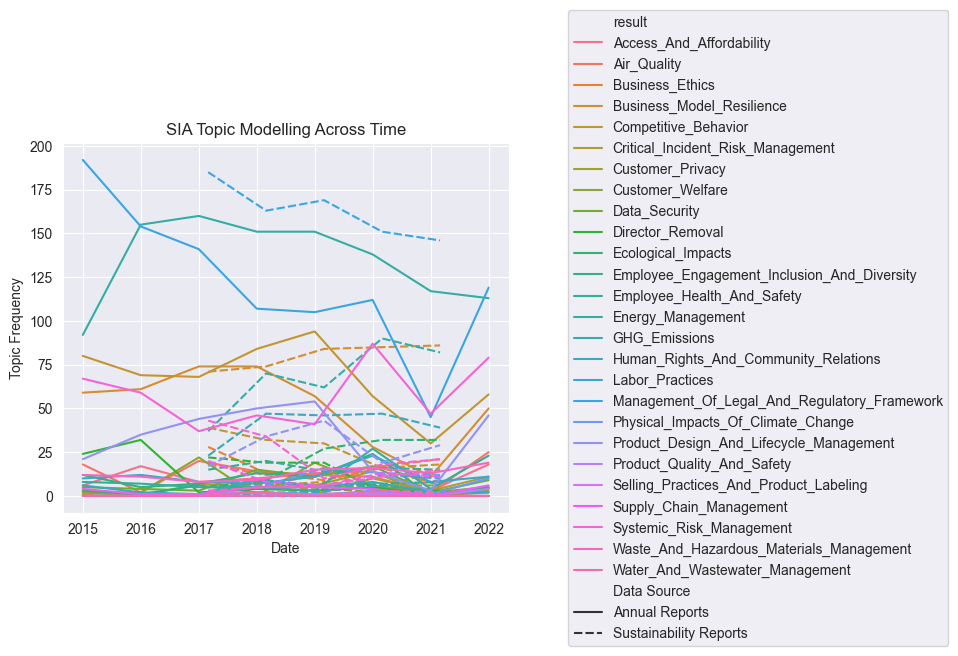

In [20]:
sia_subcategories = sia[['Data Source', 'Date', 'result']].groupby(['Data Source', 'Date', 'result']).size().unstack(
    fill_value=0).reset_index().copy()
fig,ax = plt.subplots()
sia_subcategories_long = pd.melt(sia_subcategories, id_vars=['Data Source', 'Date'])
sns.lineplot(data=sia_subcategories_long, x='Date', y='value', hue='result', style='Data Source', legend = 'full')

# Set title and labels
ax.set_title('SIA Topic Modelling Across Time')
ax.set_xlabel('Date')
ax.set_ylabel('Topic Frequency')
# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(2, 0.5))

plt.show()

### Wilmar International Ltd

In [30]:
wilmar = pd.read_pickle('wilmar_bert.pkl')

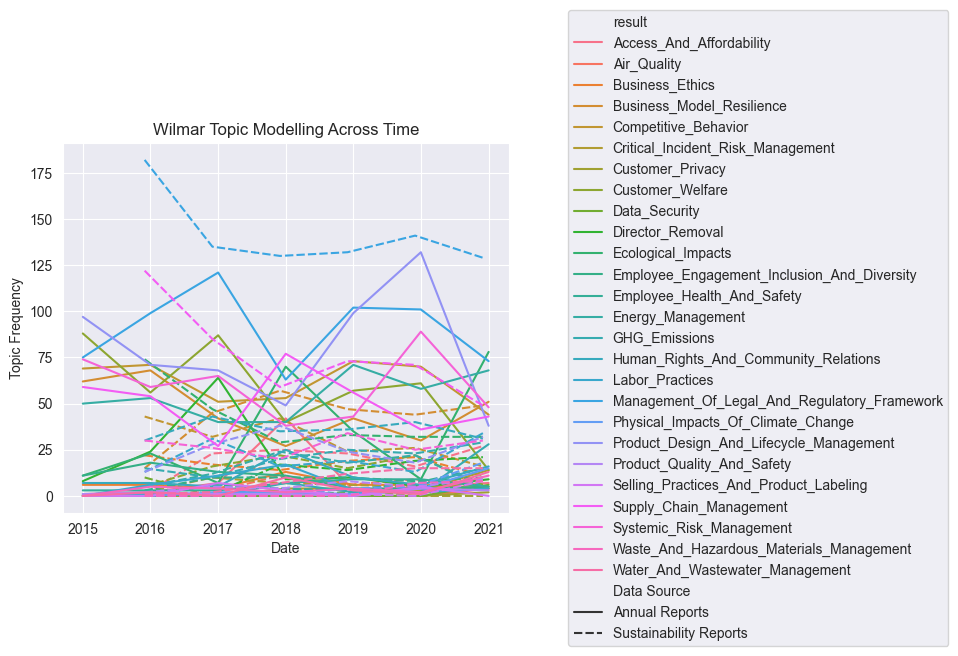

In [31]:
wilmar_subcategories = wilmar[['Data Source', 'Date', 'result']].groupby(['Data Source', 'Date', 'result']).size().unstack(
    fill_value=0).reset_index().copy()
fig,ax = plt.subplots()
wilmar_subcategories_long = pd.melt(wilmar_subcategories, id_vars=['Data Source', 'Date'])
sns.lineplot(data=wilmar_subcategories_long, x='Date', y='value', hue='result', style='Data Source', legend = 'full')

# Set title and labels
ax.set_title('Wilmar Topic Modelling Across Time')
ax.set_xlabel('Date')
ax.set_ylabel('Topic Frequency')
# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(2, 0.5))

plt.show()

### Applied Materials

In [28]:
applied_mat = pd.read_pickle('applied_mat_bert.pkl')

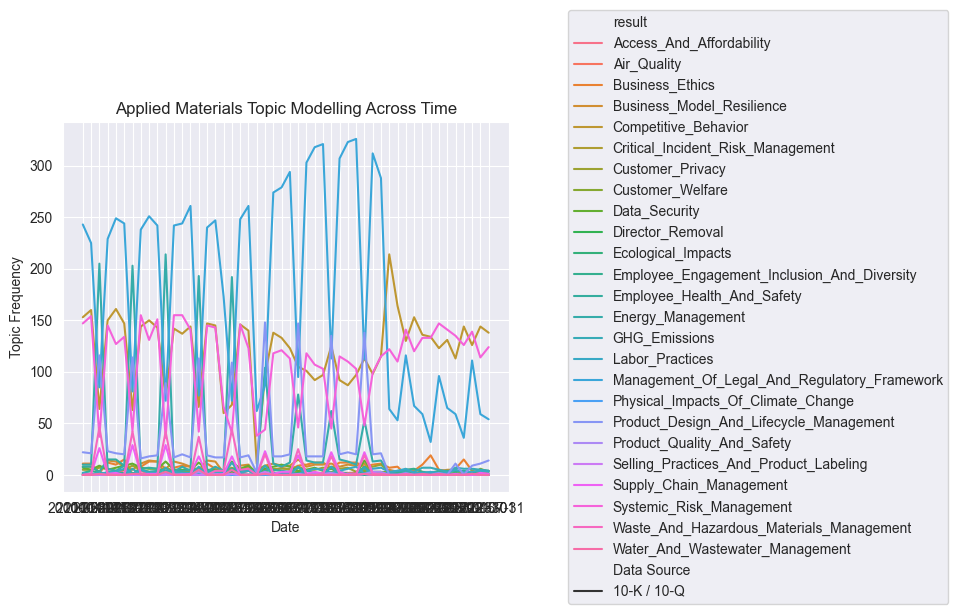

In [29]:
applied_mat_subcategories = applied_mat[['Data Source', 'Date', 'result']].groupby(['Data Source', 'Date', 'result']).size().unstack(
    fill_value=0).reset_index().copy()
fig,ax = plt.subplots()
applied_mat_subcategories_long = pd.melt(applied_mat_subcategories, id_vars=['Data Source', 'Date'])
sns.lineplot(data=applied_mat_subcategories_long, x='Date', y='value', hue='result', style='Data Source', legend = 'full')

# Set title and labels
ax.set_title('Applied Materials Topic Modelling Across Time')
ax.set_xlabel('Date')
ax.set_ylabel('Topic Frequency')
# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(2, 0.5))

plt.show()